# Healthcare Insurance Cost Analysis

## Objectives

* Load and explore the cleaned healthcare insurance dataset.

* Engineer BMI categories to better analyse the impact on insurance charges.

* Perform exploratory data analysis (EDA) to identify key factors influencing insurance costs, such as smoking status, BMI, age, and region.

* Visualise relationships using Plotly, Seaborn, and Matplotlib to gain insights and prepare for predictive modelling.

## Inputs

* Cleaned healthcare insurance dataset CSV file (e.g., data/insurance_cleaned.csv) containing personal and geographic attributes along with insurance charges.

## Outputs

* Interactive and static visualisations demonstrating data distributions and relationships (e.g., bar plots, boxplots, scatter plots, correlation heatmaps).

* New feature column bmi_category added to the dataset for categorical analysis.

* Insightful summary of variables affecting insurance charges to inform further modelling steps.

## Additional Comments

* This notebook focuses on initial data understanding and visualisation; predictive modelling will be developed in subsequent notebooks.

* Assumes data has been cleaned and preprocessed in a prior ETL step (etl.py or similar).

* Plotly is included for interactivity, improving exploratory analysis and presentation.



---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-'

# Section 1- Extracting Data 

Section 1 content:

* Imported the necessary Python libraries for data analysis and visualisation, including pandas, NumPy, Matplotlib, Seaborn, and Plotly.

* Loaded the dataset from the designated data folder.

* Examined the first few rows of the dataset to gain an initial understanding of its structure.

* Reviewed the data types and count of non-null values in each column using the .info() method.

* Obtained summary statistics of the numerical variables with the .describe() method to better understand data distributions.

Import the packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Extract the data

In [5]:
import os 
print ( os.getcwd())

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-


In [6]:
df = pd.read_csv('data/cleaned_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,Obese
2,28,0,33.000,3,0,4449.46200,False,True,False,Obese
3,33,0,22.705,0,0,21984.47061,True,False,False,Normal
4,32,0,28.880,0,0,3866.85520,True,False,False,Overweight


Find out basic information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
 9   bmi_category      1337 non-null   object 
dtypes: bool(3), float64(2), int64(4), object(1)
memory usage: 77.2+ KB


In [8]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Section 2- Transforming Data 

In this section, I carried out data cleaning and preparation by:

* Verifying that there were no missing values using .isnull().sum().

* Identifying and removing duplicate records to ensure data quality if neccessary. 

Check for any missing data

In [9]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
bmi_category        0
dtype: int64

Check for duplicate rows

In [10]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


# Section 3- Data Visualisation

In this section, I produced a series of visualisations to explore the three initial hypotheses. These charts are intended to reveal patterns and insights within the dataset, using tools such as Seaborn, Matplotlib, and Plotly. Each visualisation is specifically designed to support or challenge one of the hypotheses outlined at the beginning of the project.



# 1. How does BMI impact insurance charges?

We will categorise BMI into groups and compare the average insurance charges among these groups.

* Define BMI categories 

---

In [11]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

* Show count of each BMI category to verify

In [12]:
df['bmi_category'].value_counts()

bmi_category
Obese            706
Overweight       386
Normal weight    225
Underweight       20
Name: count, dtype: int64

* Visualise average insurance charges by BMI category using Seaborn barplot

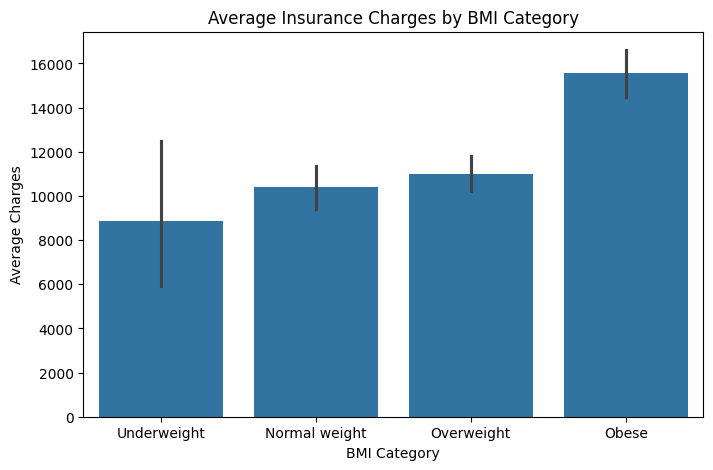

In [13]:
plt.figure(figsize=(8,5))
order = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
sns.barplot(x='bmi_category', y='charges', data=df, order=order)
plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.show()

# 2. How do insurance charges differ between smokers and non-smokers?

* We will compare the average insurance charges between smokers and non-smokers using bar plots and boxplots.

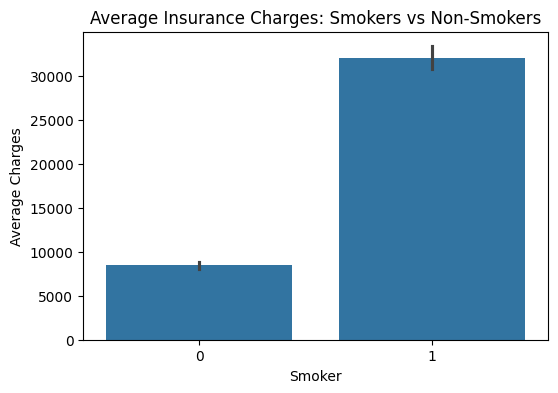

In [14]:
# Barplot of average charges by smoker status (Seaborn)
plt.figure(figsize=(6,4))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Average Insurance Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()

<Figure size 600x400 with 0 Axes>

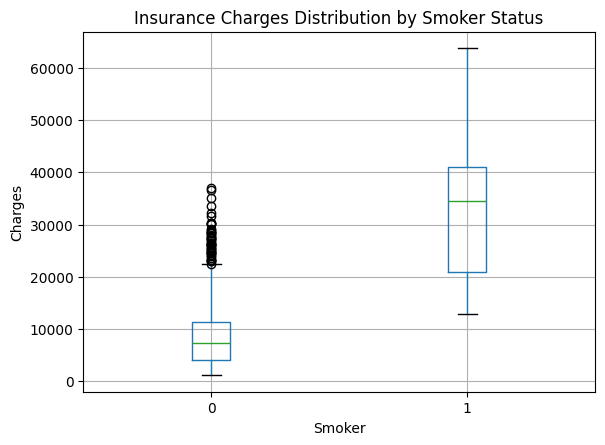

In [15]:
# Boxplot of charges by smoker status (Matplotlib boxplot)
plt.figure(figsize=(6,4))
df.boxplot(column='charges', by='smoker')
plt.title('Insurance Charges Distribution by Smoker Status')
plt.suptitle('')  # Remove default title
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# 3. Which variables have the strongest influence on insurance charges?

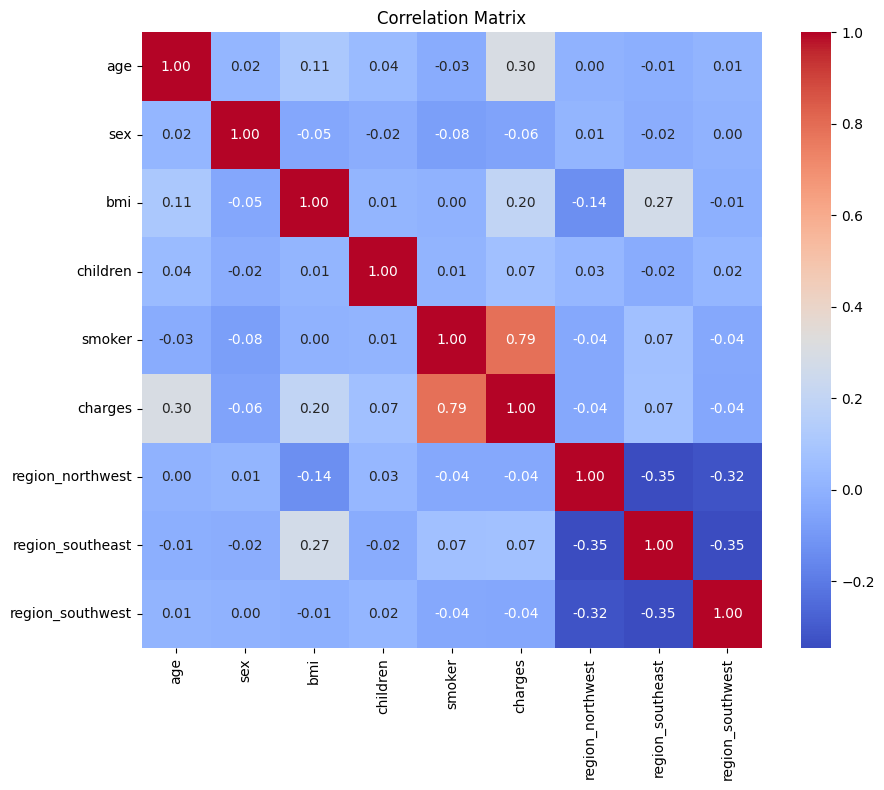

In [16]:
# Correlation heatmap (Seaborn)
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['number', 'bool'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [17]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [18]:
import plotly.io as pio
pio.renderers.default = "notebook"

* We will analyse the correlation matrix and create scatter plots for key variables strongly correlated with charges. 

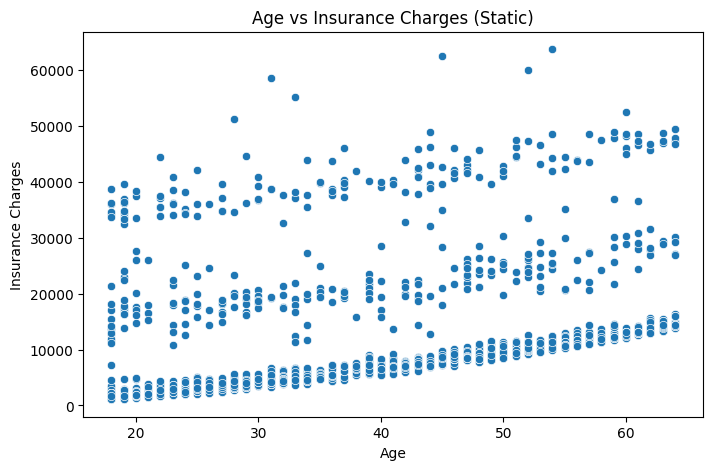

In [29]:
# Static version for GitHub preview
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Insurance Charges (Static)')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

In [30]:
# Scatter plot of Age vs Charges (Plotly for interactivity)
fig = px.scatter(df, x='age', y='charges', title='Age vs Insurance Charges',
                 labels={'age':'Age', 'charges':'Insurance Charges'}, trendline='ols')
fig.show()

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

divide by zero encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

overflow encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

invalid value encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1723: RuntimeWarning:

divide by zero encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1723: RuntimeWarning:

overflow encountered in dot

/Users/nasraibra

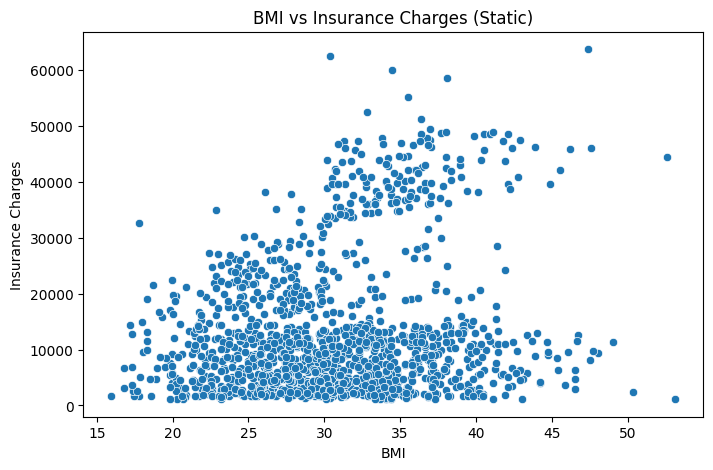

In [32]:
# Static version for GitHub preview
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs Insurance Charges (Static)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

In [33]:
# Scatter plot of BMI vs Charges (Plotly for interactivity)
fig = px.scatter(df, x='bmi', y='charges', title='BMI vs Insurance Charges',
                 labels={'bmi':'BMI', 'charges':'Insurance Charges'}, trendline='ols')
fig.show()

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

divide by zero encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

overflow encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:409: RuntimeWarning:

invalid value encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1723: RuntimeWarning:

divide by zero encountered in dot

/Users/nasraibrahim/Documents/vscode-projects/Individual-Project-1-/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1723: RuntimeWarning:

overflow encountered in dot

/Users/nasraibra

# Section 4 – Insights and Findings

# 1. Impact of BMI on insurance charges

* Insights and Findings

When we categorise BMI into four groups—Underweight, Normal weight, Overweight, and Obese—and visualise the average insurance charges for each group using a barplot, a clear pattern emerges: insurance charges increase as BMI increases. People classified as Obese have noticeably higher average charges compared to those in the Normal or Underweight categories.

* Reasoning

Higher BMI values are associated with an increased risk of health problems such as hypertension, diabetes, heart disease, and other chronic conditions. These health issues typically require more medical attention and lead to higher healthcare costs. Insurance companies reflect this risk by charging higher premiums to individuals with higher BMI. Therefore, the observed rise in insurance charges by BMI category is expected and aligns with real-world health risk assessments.

# 2. Differences in insurance charges between smokers and non-smokers

* Insights and Findings

Using both barplots and boxplots, we see that smokers pay significantly higher average insurance charges than non-smokers. The barplot shows the difference in average charges clearly, while the boxplots illustrate that smokers have a wider range and variability in their charges, including more extreme values.

* Reasoning 

Smoking is a major risk factor for a variety of serious diseases including lung cancer, chronic obstructive pulmonary disease (COPD), and cardiovascular disease. These conditions increase healthcare utilisation and costs. Insurance providers increase premiums for smokers to compensate for the higher expected medical expenses. The greater variability among smokers likely reflects differences in smoking intensity, duration, and presence of smoking-related illnesses, which affect individual risk levels and thus insurance charges.

# 3. Key variables influencing insurance charges

* Insights and Findings 

By examining the correlation heatmap, we identify that age and BMI have the strongest positive correlations with insurance charges. Scatter plots of Age vs Charges and BMI vs Charges reinforce this relationship by showing upward trends, meaning insurance charges increase as either age or BMI increases.

* Reasoning

Age is naturally linked to increasing health risks as people get older, such as the onset of chronic diseases and general health decline, leading to higher medical costs. Similarly, BMI is an indicator of potential obesity-related health problems, which also drive up healthcare spending. Together with smoking status, these variables form a trio of the most important factors impacting insurance premiums. Insurers rely heavily on these indicators to assess risk and set charges accordingly.

# Summary Of Findings 

Our analysis reveals that insurance charges are significantly influenced by several key factors. Higher BMI categories correspond to increased insurance costs, reflecting the greater health risks and medical expenses associated with overweight and obesity. Smoking status is another major determinant, with smokers facing substantially higher and more variable insurance charges due to the elevated risk of serious smoking-related illnesses. Additionally, age shows a strong positive relationship with insurance charges, as older individuals generally incur higher medical costs. Together, BMI, smoking status, and age emerge as the primary drivers of insurance premiums, highlighting how insurers assess risk based on these important health and lifestyle variables.

# Section 5- – Conclusions and Next Steps

# Conclusion

This project has demonstrated how key personal health factors influence insurance charges. Through data visualisation and analysis, we established that BMI, smoking status, and age are the strongest predictors of insurance costs. Higher BMI and smoking are associated with significantly increased charges, reflecting their impact on health risk and medical expenses. Age also plays a crucial role, with older individuals generally facing higher premiums. Understanding these relationships is essential both for individuals aiming to manage their health and for insurers assessing risk. Future work could extend this analysis by incorporating additional variables or exploring predictive models to estimate insurance costs more accurately.



# Next Steps

1- Incorporate Additional Variables: Explore other potentially influential factors such as geographic location, occupation, or family medical history to see how they affect insurance charges.

2- Build Predictive Models: Develop regression or machine learning models to predict insurance charges based on the key variables identified, improving the accuracy and utility of the analysis.

3- Analyse Temporal Trends: If data over multiple years is available, investigate how insurance charges and their drivers have changed over time.

4- Segment by Demographics: Perform subgroup analyses by gender, region, or socioeconomic status to uncover nuanced patterns in insurance costs.

5- Explore Health Interventions: Study the impact of health interventions or lifestyle changes (e.g., quitting smoking, weight loss) on the reduction of insurance charges.

6- Enhance Visualisation: Use interactive dashboards or tools to make the data exploration more dynamic and user-friendly for stakeholders.

---